### Imports and data extraction

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


URL = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
URL = "https://drive.google.com/uc?id=" + URL.split("/")[-2]

pd.set_option("display.precision", 2)
tmp = pd.read_csv(URL)
df = tmp
df.index += 1

print(df)

         N                 Должность Язык.программирования Специализация  \
1        1        Junior QA engineer                   NaN     Manual QA   
2        2        Junior QA engineer                   NaN     Manual QA   
3        3         Software Engineer               C#/.NET           NaN   
4        4         Software Engineer            JavaScript           NaN   
5        5  Senior Software Engineer            JavaScript           NaN   
...    ...                       ...                   ...           ...   
8700  8700               QA engineer                   NaN     Manual QA   
8701  8701                 Marketing                   NaN           NaN   
8702  8702  Junior Software Engineer            Ruby/Rails           NaN   
8703  8703                 Team lead                   NaN           NaN   
8704  8704  Senior Software Engineer                  Java           NaN   

     Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
1             

### Read head of the resulting table

In [93]:
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
1,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
2,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
3,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
4,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
5,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


### Determine the size of the table

In [94]:
df.shape

(8704, 25)

###  Define the types of all columns

In [95]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

### Calculate the percentage of blanks in each column

In [96]:
nan_count = df.isna().sum().div(df.shape[0])
print(nan_count)

N                                   0.00
Должность                           0.00
Язык.программирования               0.44
Специализация                       0.83
Общий.опыт.работы                   0.00
Опыт.работы.на.текущем.месте        0.00
Зарплата.в.месяц                    0.00
Изменение.зарплаты.за.12.месяцев    0.00
Город                               0.00
Размер.компании                     0.00
Тип.компании                        0.00
Пол                                 0.00
Возраст                             0.00
Образование                         0.00
Университет                         0.04
Еще.студент                         0.00
Уровень.английского                 0.00
Предметная.область                  0.03
Дата.заполнения                     0.00
User.Agent                          0.00
exp                                 0.00
current_job_exp                     0.00
salary                              0.00
Валюта                              1.00
cls             

### Remove all columns with blank values except the "Programming Language" column

In [97]:
drop_list = df.isna().any()[df.isna().any() == True][1:] # pandas.series of columns with NaN values excluding the 1st one
df.drop(columns=list(drop_list.index.values), inplace=True) # transform pandas.series into normal list
df.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
1,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
2,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
3,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
4,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
5,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


### Count again what proportion of gaps are in each column and make sure that only the column "Language.programming" remains

In [98]:
nan_count = df.isna().sum().div(df.shape[0])
print(nan_count)

N                                   0.00
Должность                           0.00
Язык.программирования               0.44
Общий.опыт.работы                   0.00
Опыт.работы.на.текущем.месте        0.00
Зарплата.в.месяц                    0.00
Изменение.зарплаты.за.12.месяцев    0.00
Город                               0.00
Размер.компании                     0.00
Тип.компании                        0.00
Пол                                 0.00
Возраст                             0.00
Образование                         0.00
Еще.студент                         0.00
Уровень.английского                 0.00
Дата.заполнения                     0.00
User.Agent                          0.00
exp                                 0.00
current_job_exp                     0.00
salary                              0.00
dtype: float64


### Delete all rows with NaN values in the source table

In [99]:
df.dropna(inplace=True)
df.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
3,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
4,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
5,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
7,7,Junior Software Engineer,C#/.NET,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
8,8,Senior Software Engineer,C++,6,1,3300,500,Киев,до 10 человек,Продуктовая,мужской,28,Высшее,False,выше среднего,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300


### Define the new size of the table

In [100]:
df.shape

(4854, 20)

### Create a new python_data table, which will contain only rows with specialists who specified the Python programming language

In [101]:
python_data = df[df["Язык.программирования"] == "Python"]
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
13,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
69,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
88,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
115,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
144,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


### Determine the size of the python_data table

In [102]:
python_data.shape

(207, 20)

### Group by the "Position" column

In [103]:
python_data.groupby("Должность").head(2) # display 2 items from each group

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
13,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.00,800
69,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.50,900
88,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.50,600
115,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.50,685
303,303,Senior Software Engineer,Python,10 и более лет,0.5,3500,-300,Киев,до 200 человек,Продуктовая,мужской,30,Высшее,False,выше среднего,12/06/2017 13:46:24,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,10.0,0.50,3500
374,374,Senior Software Engineer,Python,7,0.5,3100,1000,Днепр,до 200 человек,Аутсорсинговая,мужской,30,Высшее,False,выше среднего,12/06/2017 13:58:16,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...,7.0,0.50,3100
2633,2633,Technical Lead,Python,4,1.5,3500,1000,Киев,до 50 человек,Продуктовая,мужской,23,Незаконченное высшее,False,выше среднего,13/06/2017 12:37:02,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,4.0,1.50,3500
3146,3146,Technical Lead,Python,10 и более лет,2,1425,475,Киев,до 50 человек,Аутсорсинговая,мужской,43,Высшее,False,выше среднего,13/06/2017 14:51:19,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52....,10.0,2.00,1425
5749,5749,System Architect,Python,10 и более лет,0.25,3000,0,Киев,до 50 человек,Продуктовая,мужской,40,Высшее,False,выше среднего,20/06/2017 18:40:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,10.0,0.25,3000
8229,8229,System Architect,Python,10 и более лет,2,5000,0,Киев,до 10 человек,Продуктовая,мужской,31,Высшее,False,средний,06/07/2017 19:15:05,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_4...,10.0,2.00,5000


### Create a new DataFrame where for the data grouped by the Position column, aggregate the data and find the min and max values in the Salary.monthly column

In [104]:
gr_data = python_data.groupby("Должность", sort=True)
salary = gr_data.agg(["min", "max"])["Зарплата.в.месяц"]
print(salary)

                           min   max
Должность                           
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


### Create a function fill_avg_salary that will return the average monthly salary. Use it to create a new column "avg"

In [105]:
def fill_avg_salary(df_row):
    position = df_row["Должность"]
    avg_salary = salary.loc[position].mean()
    return avg_salary
python_data["avg"] = python_data.apply(fill_avg_salary, axis=1)
python_data.head()

C:\Users\inna_\AppData\Local\Temp\ipykernel_17416\945769909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_data["avg"] = python_data.apply(fill_avg_salary, axis=1)


,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,avg
13,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,...,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,2950.0
69,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,...,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,2950.0
88,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,...,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,675.0
115,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,...,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,675.0
144,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,...,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,675.0


### Create descriptive statistics for the new column

In [106]:
python_data["avg"].describe()

count     207.00
mean     2658.03
std      1530.91
min       675.00
25%       675.00
50%      2950.00
75%      2950.00
max      5250.00
Name: avg, dtype: float64

### Save the resulting table in a CSV file

In [107]:
python_data.to_csv("python_data.csv", index=False)

## Visualization

### Programming Languages Distribution

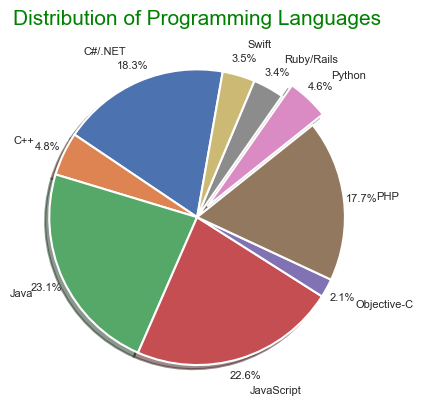

In [230]:
gr_language = df.groupby("Язык.программирования", sort=True)
languages = gr_language.agg({"Язык.программирования": "count"})
languages.rename(columns={"Язык.программирования": "Quantity"}, inplace=True)
languages = languages[languages.Quantity > 55]

explode = [0, 0, 0, 0, 0, 0, 0.1, 0, 0]
fig, ax = plt.subplots()
ax.pie(
    languages.Quantity,
    explode=explode,
    labels=languages.index.values,
    autopct="%1.1f%%",
    shadow=True,
    startangle=80,
    pctdistance=1.12,
    labeldistance=1.22,
    textprops={"size": "8"},
    radius=1,
)
plt.title(
    "Distribution of Programming Languages",
    fontsize="small",
    color="green",
)
plt.show()

### Monthly Salary by Programming Language

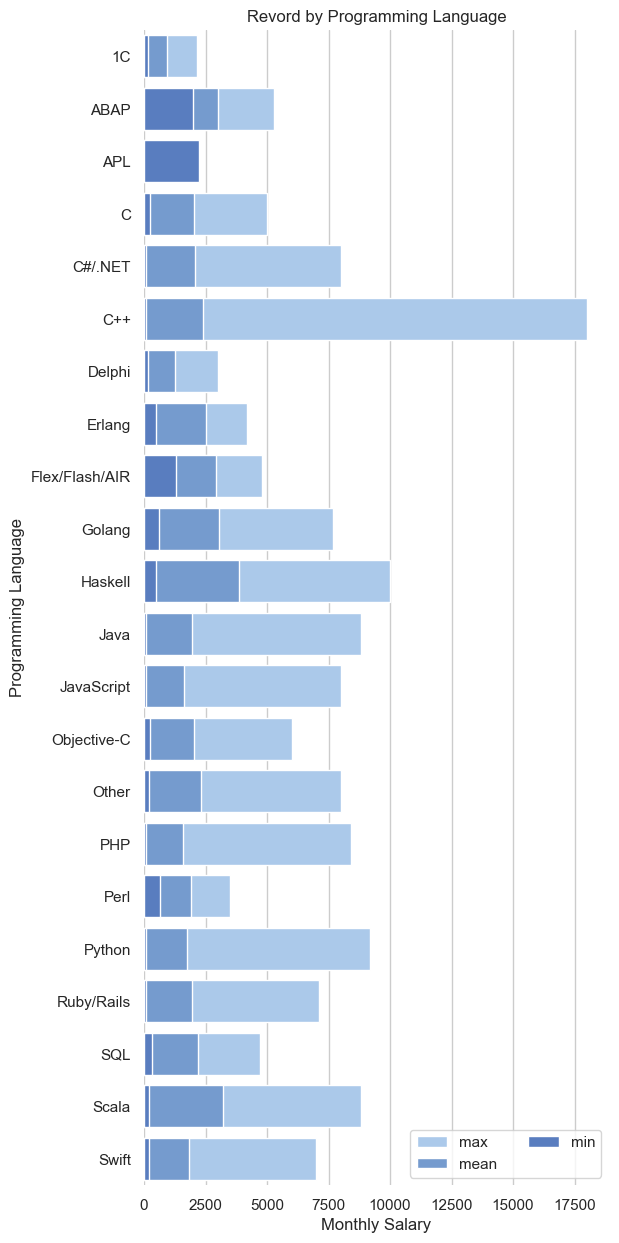

In [152]:
gr_lang = df[["Язык.программирования", "Зарплата.в.месяц"]].groupby(
    "Язык.программирования", sort=True
)
lang_salary = gr_lang.agg(["min", "mean", "max"])

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(
    x=("Зарплата.в.месяц", "max"),
    y="Язык.программирования",
    data=lang_salary,
    label="max",
    color="b",
)
sns.set_color_codes("muted")
sns.barplot(
    x=("Зарплата.в.месяц", "mean"),
    y="Язык.программирования",
    data=lang_salary,
    label="mean",
    color="#69d",
)
sns.set_color_codes("muted")
sns.barplot(
    x=("Зарплата.в.месяц", "min"),
    y="Язык.программирования",
    data=lang_salary,
    label="min",
    color="b",
)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(
    ylabel="Programming Language",
    xlabel="Monthly Salary",
    title="Revord by Programming Language",
)
sns.despine(left=True, bottom=True)
plt.show()

### Salary by Position Breakdown

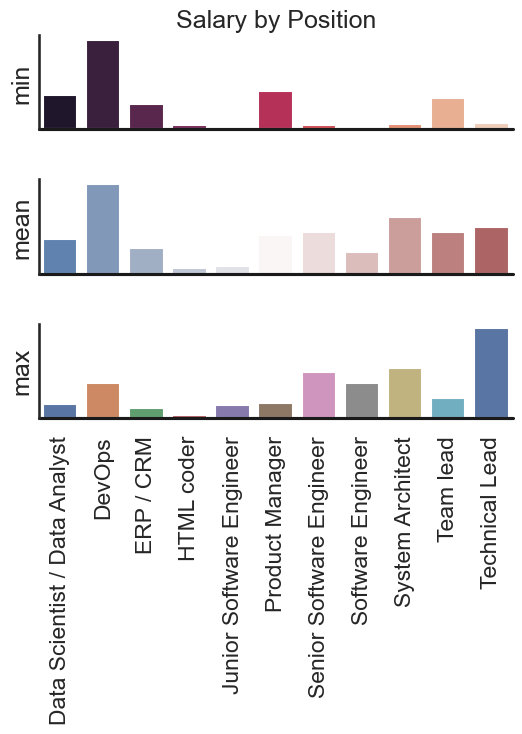

In [153]:
gr_pos = df[["Должность", "Зарплата.в.месяц"]].groupby("Должность", sort=True)
pos_salary = gr_pos.agg(["min", "mean", "max"])

sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

x = pos_salary.index.values

y1 = pos_salary[("Зарплата.в.месяц", "min")]
sns.barplot(x=x, y=y1, hue=x, palette="rocket", ax=ax1).set_title("Salary by Position")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("min")

y2 = pos_salary[("Зарплата.в.месяц", "mean")]
sns.barplot(x=x, y=y2, hue=x, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("mean")

y3 = pos_salary[("Зарплата.в.месяц", "max")]
sns.barplot(x=x, y=y3, hue=x, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("max")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.xticks(rotation=90)
plt.show()